In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.pandas.set_option('display.max_columns', None)

import pickle
import warnings
warnings.simplefilter(action='ignore')

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import QuantileTransformer
from mlxtend.regressor import StackingCVRegressor

The estimators that will be assessed in this jupyter notebook are:
ElasticNet, RandomForestRegressor, XGBRegressor

In [4]:
project_path = r'C:\Users\kchanas\Documents\Learning\Kaggle\House_Prices'
X_train = pd.read_csv(os.path.join(project_path, r'data\X_train.csv'), index_col=0)
y_train = pd.read_csv(os.path.join(project_path, r'data\y_train.csv'), index_col=0, names=['SalePrice'])
X_test = pd.read_csv(os.path.join(project_path, r'data\X_test.csv'), index_col=0)
y_test = pd.read_csv(os.path.join(project_path, r'data\y_test.csv'), index_col=0, names=['SalePrice'])

In [5]:
with open(os.path.join(project_path, r'data\selected_features.txt'), "rb") as f:
      selected_features = pickle.load(f)

In [6]:
print(selected_features)

['GrLivAndBsmtArea', 'OverallQual', 'Neighborhood', 'GrLivArea', 'YearRemodAdd', 'GarageArea', 'LotArea', 'KitchenQual', 'GarageCars', '1stFlrSF', 'BsmtFinSF1', 'OverallCond', 'BsmtUnfSF', 'SaleCondition', 'GarageType', 'MSZoning', 'CentralAir']


In [7]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [8]:
pipe_en = Pipeline([
                   ('model', TransformedTargetRegressor(ElasticNet(random_state=1),func = np.log, inverse_func=np.exp))
])

pipe_rf = Pipeline([
                       ('model', TransformedTargetRegressor(RandomForestRegressor(oob_score=True, random_state=1),
                                                            func = np.log, inverse_func=np.exp))
])

pipe_xgb = Pipeline([
                       ('model', TransformedTargetRegressor(XGBRegressor(random_state=1),func = np.log, inverse_func=np.exp))
])

In [9]:
grid_params_en = {'model__regressor__alpha':np.linspace(0.02,1,5),
                 'model__regressor__l1_ratio': np.linspace(0,1,5)
}

grid_params_rf = {'model__regressor__n_estimators':[100, 200, 300, 400]    
}

grid_params_xgb = {'model__regressor__learning_rate':[0.001, 0.01, 0.05, 0.1],
                 'model__regressor__n_estimators':[100, 200, 300, 400]
                 }

In [10]:
models_names = ['ElasticNet', 'RandomForest', 'XGB']
models = [pipe_en, pipe_rf, pipe_xgb]
grid_params = [grid_params_en, grid_params_rf, grid_params_xgb]

In [11]:
cv = KFold(n_splits=10, random_state=1)
jobs = -1
n_search = []
for model, grid_param in zip(models, grid_params):
    n_search.append(GridSearchCV(estimator=model, param_grid=grid_param, scoring='neg_mean_squared_error',cv=cv,verbose=1)) 

In [12]:
best_models = {}
for model_name, search in zip(models_names, n_search):
    search.fit(X_train, y_train)
    best_models[model_name] = (search.best_estimator_, search.best_score_, search.best_params_)
    print(model_name, "Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        TransformedTargetRegressor(check_inverse=True,
                                                                   func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=ElasticNet(alpha=1.0,
                                                                                        copy_X=True,
                                                                                        fit_intercept=True,
                                                                                        l1_ratio=0.5,
                                                                                        max_iter=1000,
           

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ElasticNet Best parameter (CV score=-574487439.752):
{'model__regressor__alpha': 0.02, 'model__regressor__l1_ratio': 0.0}
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.1min finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        TransformedTargetRegressor(check_inverse=True,
                                                                   func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=RandomForestRegressor(bootstrap=True,
                                                                                                   criterion='mse',
                                                                                                   max_depth=None,
                                                                                                   max_features='auto',
                                                          

RandomForest Best parameter (CV score=-637912536.293):
{'model__regressor__n_estimators': 400}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   57.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        TransformedTargetRegressor(check_inverse=True,
                                                                   func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=XGBRegressor(base_score=0.5,
                                                                                          booster='gbtree',
                                                                                          colsample_bylevel=1,
                                                                                          colsample_bytree=1,
                                                                                         

XGB Best parameter (CV score=-556960445.973):
{'model__regressor__learning_rate': 0.05, 'model__regressor__n_estimators': 300}


(0, 745000.0)

(0, 745000.0)

test mse: 643954115
test rmse: 25376
test r2: 0.9097084648725409


[Text(0, 0.5, 'prediction'),
 Text(0.5, 0, 'target'),
 Text(0.5, 1.0, 'ElasticNet, RMSE: 25376.251')]

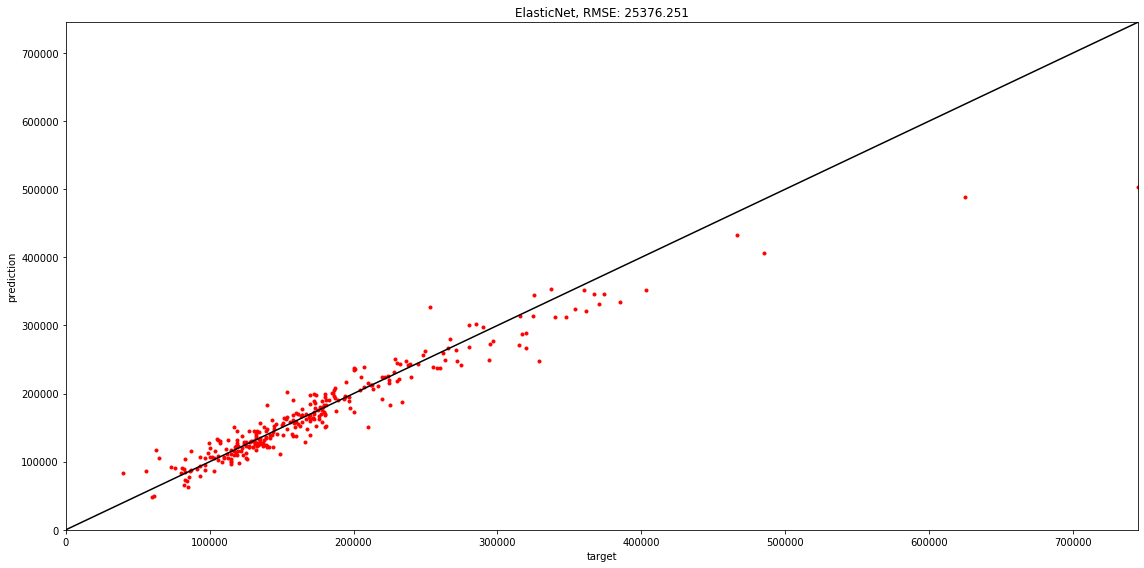

(0, 745000.0)

(0, 745000.0)

test mse: 841197861
test rmse: 29003
test r2: 0.8820520835453767


[Text(0, 0.5, 'prediction'),
 Text(0.5, 0, 'target'),
 Text(0.5, 1.0, 'RandomForest, RMSE: 29003.411')]

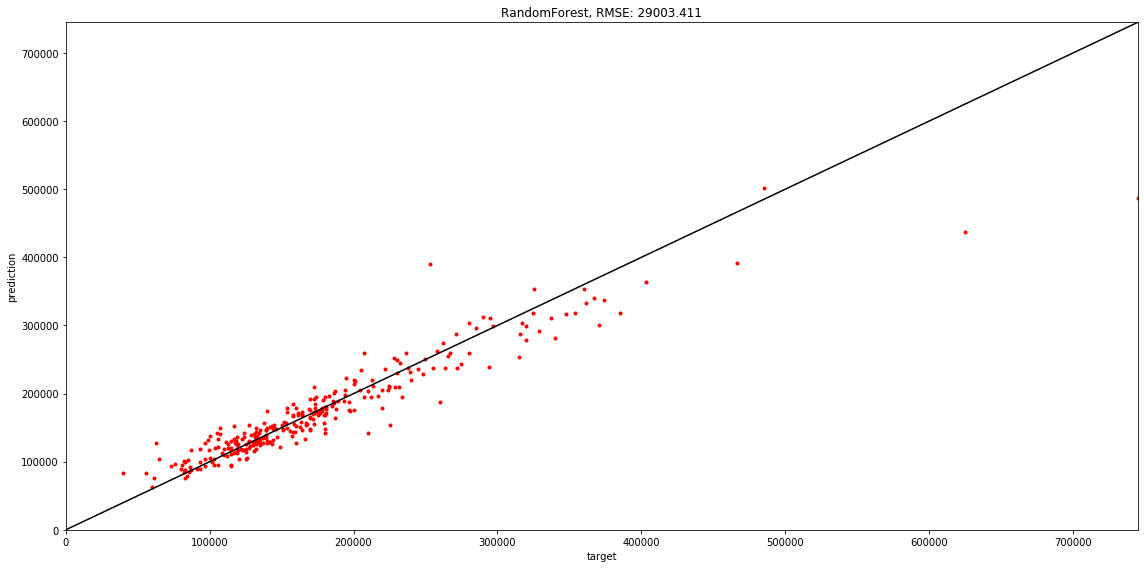

(0, 745000.0)

(0, 745000.0)

test mse: 760260335
test rmse: 27572
test r2: 0.8934006769496636


[Text(0, 0.5, 'prediction'),
 Text(0.5, 0, 'target'),
 Text(0.5, 1.0, 'XGB, RMSE: 27572.819')]

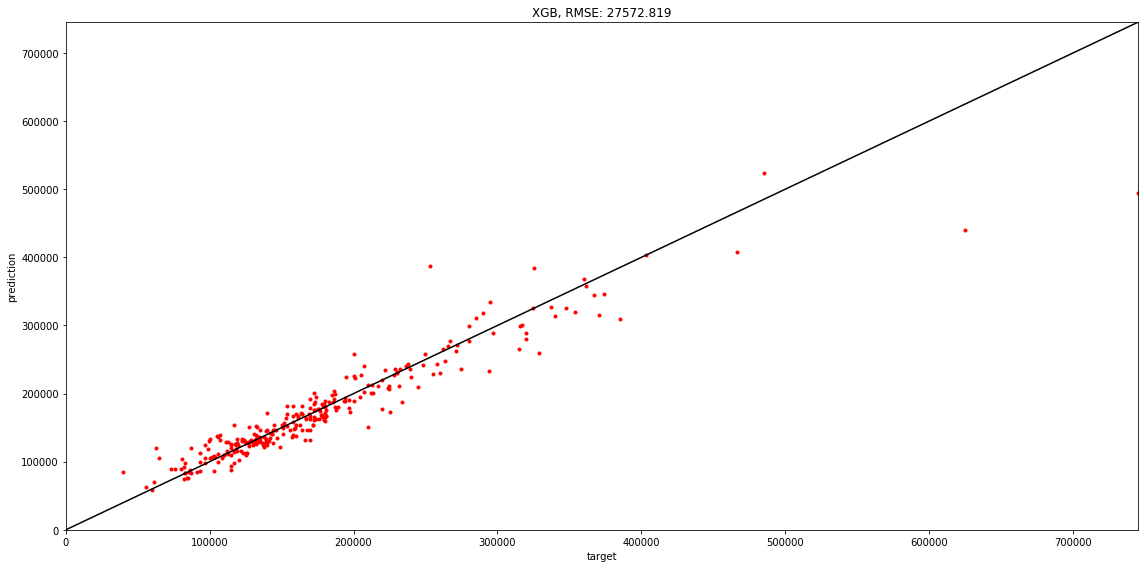

In [13]:
for model_name in models_names:
    pred = best_models[model_name][0].predict(X_test)
    #pred = np.exp(pred)
    fig, ax = plt.subplots(figsize=(16,8))
    ax_max = np.ceil(np.max([y_test.max().iloc[0], pred.max()])/10) *10
    ax.plot(y_test, pred, 'r.', label='Actual')
    ax.plot([0, ax_max], [0,ax_max], 'k-' , label='Equal')
    ax.set_ylim(0,ax_max)
    ax.set_xlim(0,ax_max)
    mse = mean_squared_error(y_test, pred)
    print('test mse: {}'.format(int(
        mean_squared_error(y_test, pred))))
    print('test rmse: {}'.format(int(
        np.sqrt(mean_squared_error(y_test, pred)))))
    print('test r2: {}'.format(
        r2_score(y_test, pred)))
    ax.set(title=f"{model_name}, RMSE: {np.sqrt(mse):0.3f}" , xlabel='target', ylabel='prediction')
    fig.tight_layout()
    # determine mse and rmse
  
    plt.show()

The best estimator is ElasticNet with alpha = 0.02 and l1_ratio = 0. The rmse for this estimator is 25376.

In the next step I will check which two models have the least correlated errors on X_test, which means that one model deals better with some observations and the other one with other observations. Then I will build Stacking Model based on these two models.

In [25]:
check_errors = []

for model_name in models_names:
    pred = best_models[model_name][0].predict(X_test)
    pred = pd.DataFrame(pred, index=y_test.index, columns = ['Prediction'])
    errors = pd.concat([y_test, pred], axis=1)
    errors['ERROR_' + model_name] = (errors['Prediction'] / errors['SalePrice']-1) * 100 
    check_errors.append(errors['ERROR_' + model_name].tolist())

check_errors = pd.DataFrame(zip(check_errors[0], check_errors[1], check_errors[2]), columns=models_names, index=y_test.index)

In [26]:
check_errors.head()

,ElasticNet,RandomForest,XGB
259,-4.295590,-9.597624,-8.901471
268,-3.404963,-12.871609,-10.569055
289,-5.337273,-2.780473,-4.967168
650,-15.405118,-6.695091,-9.907175
1234,-4.822515,6.387636,-0.279963


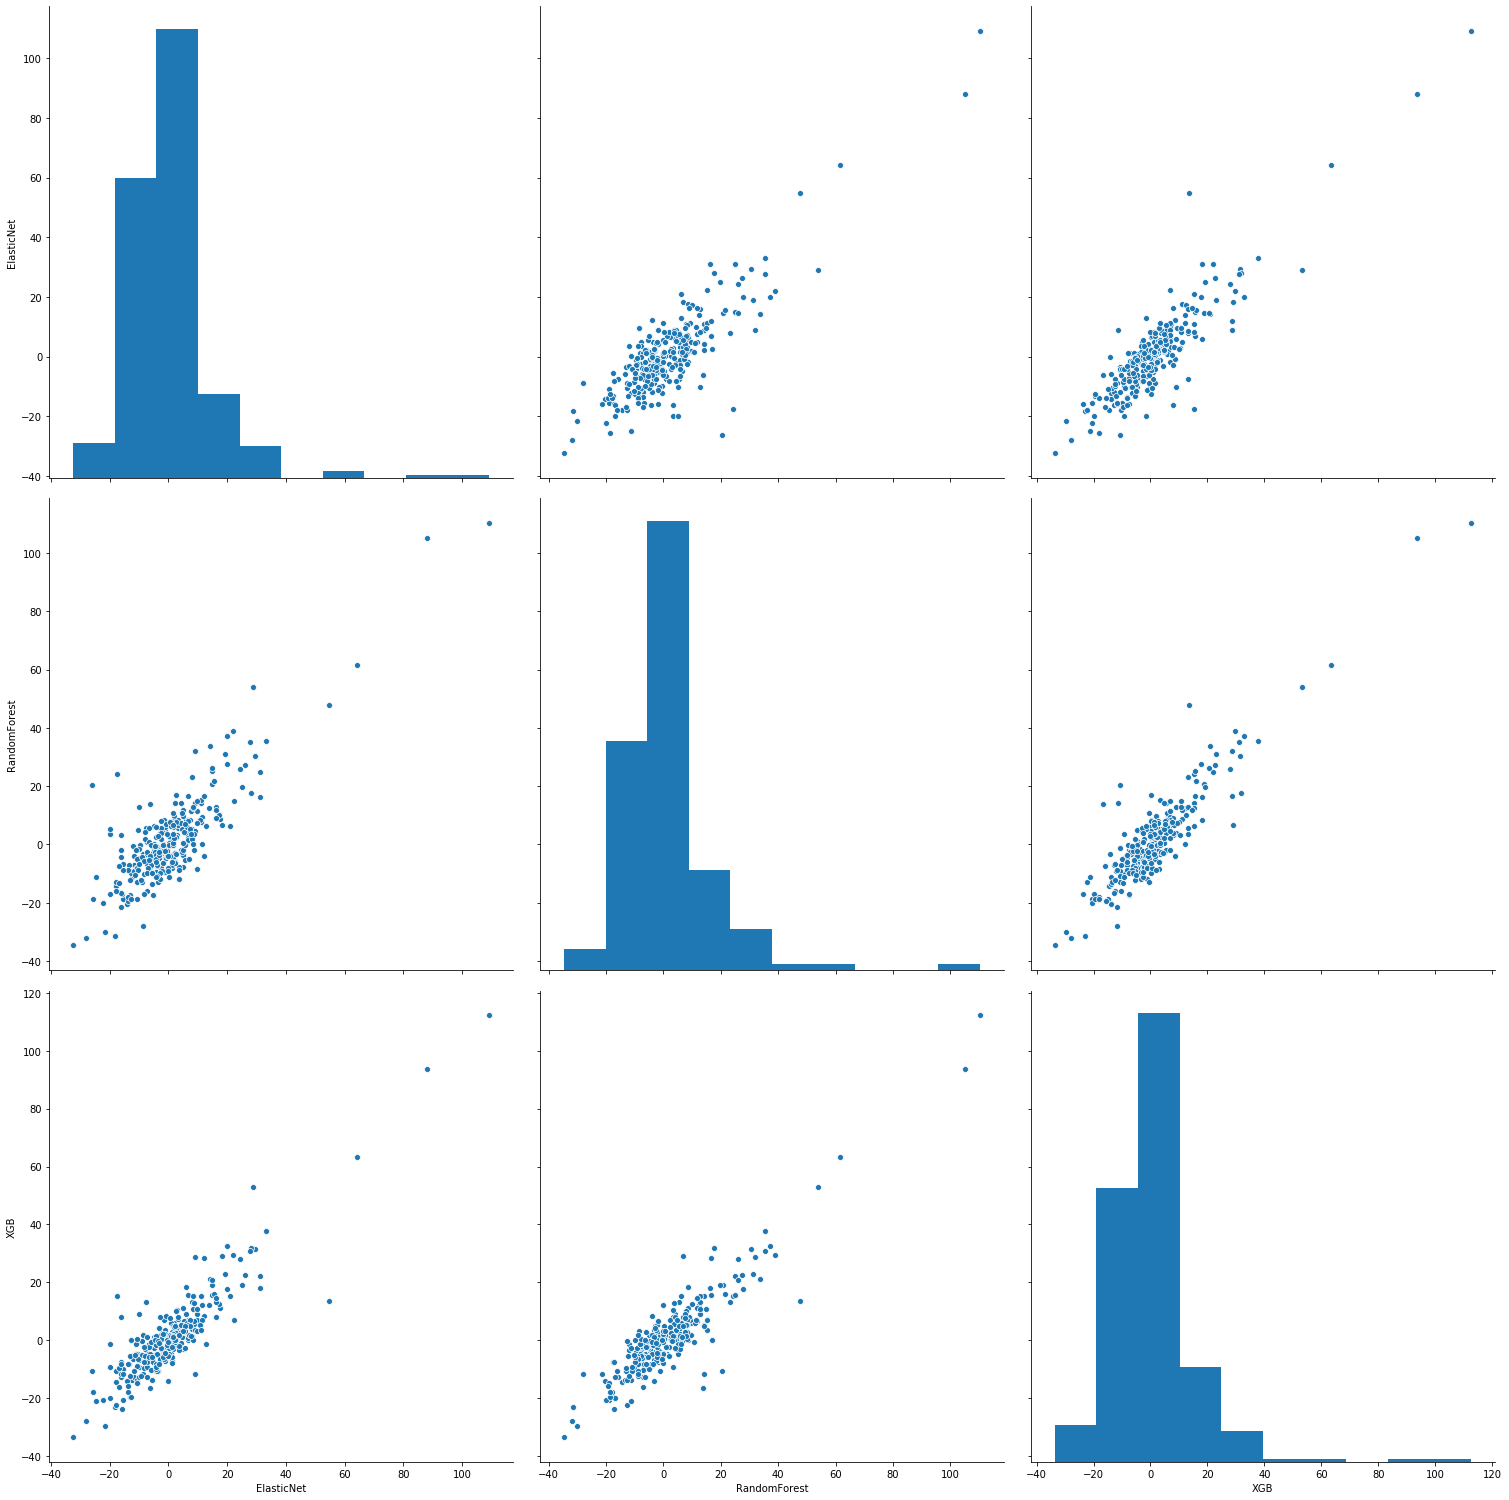

In [27]:
sns.pairplot(check_errors, height=7, aspect=1)
plt.show()

<Figure size 504x504 with 0 Axes>

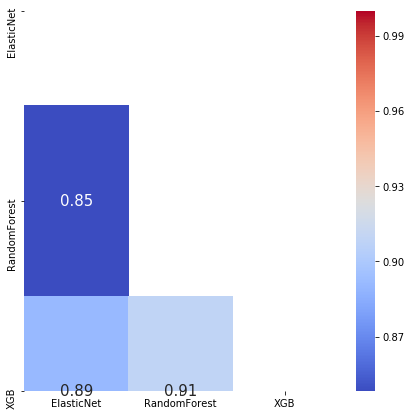

In [31]:
plt.figure(figsize=(7,7))
corr =  check_errors.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, annot_kws={"size": 15}, mask=mask, cmap='coolwarm')

As we can see from the chart above and the heatmap for correlations the least correlated errors are for ElasticNet and RandomForestRegressor. Let's build a Stacking Model based on these two models.

StackingCVRegressor(cv=5,
                    meta_regressor=Lasso(alpha=1.0, copy_X=True,
                                         fit_intercept=True, max_iter=1000,
                                         normalize=False, positive=False,
                                         precompute=False, random_state=None,
                                         selection='cyclic', tol=0.0001,
                                         warm_start=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=1,
                    refit=True,
                    regressors=[Pipeline(memory=None,
                                         steps=[('model',
                                                 TransformedTargetRegress...
                                                                                                            max_features='auto',
                                                                                                            max_leaf_nodes=N

(0, 745000.0)

(0, 745000.0)

test mse: 583961747
test rmse: 24165
test r2: 0.918120249000962


[Text(0, 0.5, 'prediction'),
 Text(0.5, 0, 'target'),
 Text(0.5, 1.0, 'StackingModel, RMSE: 24165.300')]

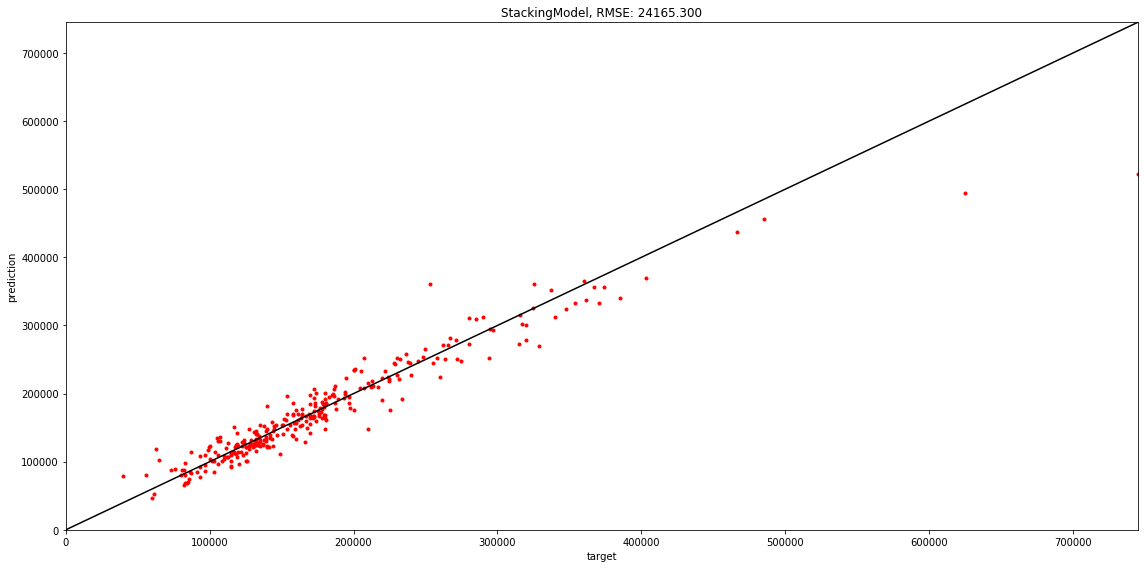

In [24]:
stack = StackingCVRegressor(regressors=[best_models['ElasticNet'][0], best_models['RandomForest'][0]],
                           meta_regressor=Lasso(), random_state=1)
stack.fit(X_train, y_train)

pred = stack.predict(X_test)
#pred = np.exp(pred)
fig, ax = plt.subplots(figsize=(16,8))
ax_max = np.ceil(np.max([y_test.max().iloc[0], pred.max()])/10) *10
ax.plot(y_test, pred, 'r.', label='Actual')
ax.plot([0, ax_max], [0,ax_max], 'k-' , label='Equal')
ax.set_ylim(0,ax_max)
ax.set_xlim(0,ax_max)
mse = mean_squared_error(y_test, pred)
print('test mse: {}'.format(int(
    mean_squared_error(y_test, pred))))
print('test rmse: {}'.format(int(
    np.sqrt(mean_squared_error(y_test, pred)))))
print('test r2: {}'.format(
    r2_score(y_test, pred)))
ax.set(title=f"StackingModel, RMSE: {np.sqrt(mse):0.3f}" , xlabel='target', ylabel='prediction')
fig.tight_layout()
# determine mse and rmse

plt.show()

In [19]:
test = pd.read_csv(os.path.join(project_path, r'data\test_lb.csv')).set_index('Id')

In [32]:
pred_lb = stack.predict(test[selected_features])
pred_lb = pd.DataFrame(pred_lb, columns = ['SalePrice'], index=test.index).reset_index()
pred_lb.to_csv(os.path.join(project_path, r'data\submission.csv'),index=False)